In [64]:
# 경고메시지(warning) 미표시
import warnings

warnings.filterwarnings('ignore')

# 웹에서 주문수를 분석

In [65]:
import pandas as pd

### 1. 데이터를 읽기


In [66]:
# customer_master.csv : 쇼핑몰 사이트의 고객 정보
# item_master.csv : 상품데이터

path_data_in = './Data_in/'

cs_m = pd.read_csv(f'{path_data_in}customer_master.csv')

item_m = pd.read_csv(f'{path_data_in}item_master.csv')

trans_1 = pd.read_csv(f'{path_data_in}transaction_1.csv')

trans_2 = pd.read_csv(f'{path_data_in}transaction_2.csv')

trans_d_1 = pd.read_csv(f'{path_data_in}transaction_detail_1.csv')

trans_d_2 = pd.read_csv(f'{path_data_in}transaction_detail_2.csv')

In [67]:
# 데이터들의 구조 파악

cs_m.info()

# trans_1.head()

# trans_d_1.head()

# trans_2.head()

# trans_d_2.head()

# item_m.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5000 non-null   object
 1   customer_name      5000 non-null   object
 2   registration_date  5000 non-null   object
 3   email              5000 non-null   object
 4   gender             5000 non-null   object
 5   age                5000 non-null   int64 
 6   birth              5000 non-null   object
 7   pref               5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


### 2. 데이터를 결합(유니언) 하기


In [68]:
trans_total = pd.concat([trans_1, trans_2], ignore_index= True)



In [69]:
# 확인용 코드

trans_total

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [70]:
# 결합 확인을 위한 코드
    # len() == 길이 확인 ### 근데 이걸 왜 하지

print(bool(
    len(trans_1) + len(trans_2) == len(trans_total) # trans 데이터들을 합친 column의 길이가 맞는 지 확인
    ),
    len(trans_total), # total의 column 수를 확인하기 위해 사용
)

True 6786


### 3. 매출 데이터끼리 결합(조인)하기


In [71]:
# detail 데이터끼리 union 결합

trans_d_total = pd.concat([trans_d_1, trans_d_2], ignore_index= True)

print(bool(
    len(trans_d_1) + len(trans_d_2) == len(trans_d_total) # trans_d 데이터들을 합친 column의 길이가 맞는 지 확인
    ),
    len(trans_d_total) # total_d의 column 수를 확인하기 위해 사용
    )

True 7144


In [72]:
# trans 데이터와 trans_d 데이터를 transaction_id, payment_date, customer_id를 기준으로 join 결합

trans = pd.merge(trans_total, trans_d_total, how= 'right', on= 'transaction_id')
# [['transaction_id', 'payment_date', 'customer_id']]
trans

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


### 4. 마스터데이터를 결합(조인)하기


In [73]:
# cs_m 데이터와 trans 데이터를 customer_id를 기준으로 join

df = pd.merge(cs_m, trans, how= 'right', on= 'customer_id')

# df 데이터와 item_m 데이터를 item_id를 기준으로 join

df = pd.merge(df, item_m, how= 'left', on= 'item_id')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        7144 non-null   object
 1   customer_name      7144 non-null   object
 2   registration_date  7144 non-null   object
 3   email              7144 non-null   object
 4   gender             7144 non-null   object
 5   age                7144 non-null   int64 
 6   birth              7144 non-null   object
 7   pref               7144 non-null   object
 8   transaction_id     7144 non-null   object
 9   price              7144 non-null   int64 
 10  payment_date       7144 non-null   object
 11  detail_id          7144 non-null   int64 
 12  item_id            7144 non-null   object
 13  quantity           7144 non-null   int64 
 14  item_name          7144 non-null   object
 15  item_price         7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 893.

### 5. 필요한 데이터 칼럼을 만들기


In [74]:
# price 필드 추가
    # ? 있는데 ???
df['price'] == df['quantity'] * df['item_price'] # 확인용 코드


0       True
1       True
2       True
3       True
4       True
        ... 
7139    True
7140    True
7141    True
7142    True
7143    True
Length: 7144, dtype: bool

### 6. 데이터를 검산하기


In [75]:
df['price'] == trans['price']

0       True
1       True
2       True
3       True
4       True
        ... 
7139    True
7140    True
7141    True
7142    True
7143    True
Name: price, Length: 7144, dtype: bool

### 7. 각종 통계량을 파악하기


In [76]:
# 결손치의 개수 파악

print(df.isnull().sum())

# 전체 파악이 되는 숫자감

print(df['payment_date'].min(),
      df['payment_date'].max())

df.describe()

customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
transaction_id       0
price                0
payment_date         0
detail_id            0
item_id              0
quantity             0
item_name            0
item_price           0
dtype: int64
2019-02-01 01:36:57 2019-07-31 23:41:38


,age,price,detail_id,quantity,item_price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,50.265677,150440.929451,3571.500000,1.199888,121698.628219
std,17.190314,85991.561558,2062.439494,0.513647,64571.311830
min,20.000000,50000.000000,0.000000,1.000000,50000.000000
25%,36.000000,85000.000000,1785.750000,1.000000,50000.000000
50%,50.000000,135000.000000,3571.500000,1.000000,102500.000000
75%,65.000000,210000.000000,5357.250000,1.000000,187500.000000
max,80.000000,750000.000000,7143.000000,4.000000,210000.000000


### 8. 월별로 데이터를 집계해보기


In [77]:
# df의 payment_date를 시계열로 변환

df['payment_date'] = pd.to_datetime(df['payment_date'], format='%Y-%m-%d %H:%M:%S')


In [78]:
# df의 payment_date에서 연월을 추출 후 새로운 column 추가

df['Ym_date'] = df['payment_date'].dt.strftime('%Y-%m')

df['Ym_date'] # 확인용 코드

# 연월 단위로 price를 집계

df_ym = df[['Ym_date', 'price']].groupby(['Ym_date']).sum()


# 결과
    # 5월의 매출이 조금 내려갔고, 6~7월은 회복, 반년동안 가장 매출이 높은 달은 7월

df_ym

,price
Ym_date,
2019-02,179190000
2019-03,175375000
2019-04,176720000
2019-05,171385000
2019-06,183395000
2019-07,188685000


### 9. 월별, 상품별로 데이터를 집계해보기


In [107]:
# 월별, 상품별로 매출의 합계, 상품의 수량을 표시

    # groupby()로 하는 방법

df_ym_item = df[['Ym_date', 'item_name','price', 'quantity']].groupby(['Ym_date', 'item_name']).sum()

test = df_ym_item.unstack()

    # 불편해서 pivot table로 변경

test_p = df.pivot_table(
    index = 'Ym_date',
    columns = 'item_name',
    values = ['price','quantity'],
    aggfunc = 'sum'
)

# 결과
    # 매출의 합계 == PC-E가 가장 높음, 수량은 값이 싼 PC-A가 높음
    # 각 상품별로 5월은 PC-B, PC-D가 증가, 큰 매출을 차지하는 PC-E의 매출이 감소
    # 6,7월은 PC-E의 매출이 크게 상승

test_p




price                                         quantity       \
item_name      PC-A      PC-B      PC-C      PC-D      PC-E     PC-A PC-B   
Ym_date                                                                     
2019-02    29270000  27785000  22905000  35010000  64220000      483  297   
2019-03    30440000  28540000  20275000  27205000  68915000      520  300   
2019-04    31600000  26850000  23665000  26045000  68560000      518  276   
2019-05    29575000  28660000  21885000  27485000  63780000      497  298   
2019-06    30650000  28020000  24865000  32550000  67310000      520  282   
2019-07    30225000  31350000  21715000  28170000  77225000      505  332   

                          
item_name PC-C PC-D PC-E  
Ym_date                   
2019-02    165  173  285  
2019-03    159  143  305  
2019-04    183  135  309  
2019-05    171  144  280  
2019-06    182  160  302  
2019-07    162  145  341

### 10. 상품별 매출추이를 가시화해 보기

<Axes: xlabel='Ym_date'>

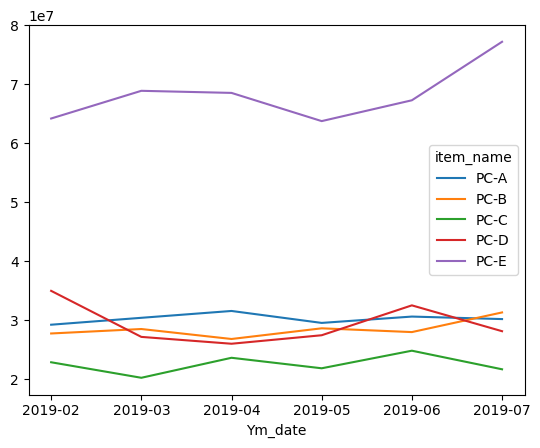

In [108]:
# plot()으로 가시화

test_p['price'].plot(kind = 'line')

<Axes: xlabel='Ym_date'>

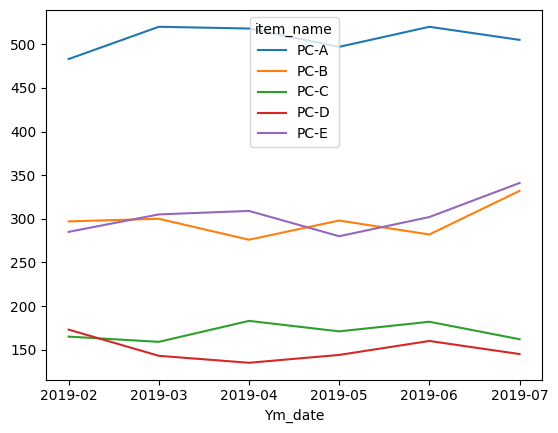

In [109]:
test_p['quantity'].plot(kind= 'line')

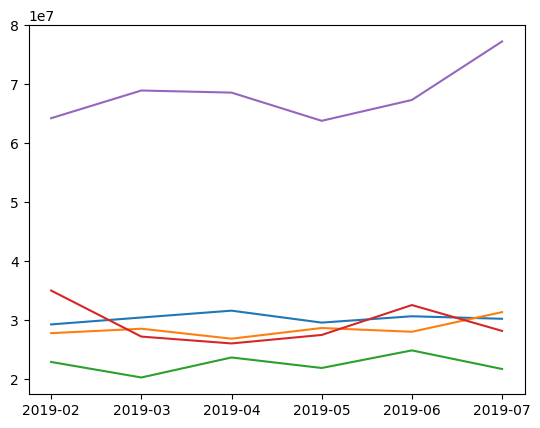

In [111]:
# matplotlib.pyplot 사용해서 시각화 하는 방법

import matplotlib.pyplot as plt

graph_data = df.pivot_table(
    index = 'Ym_date',
    columns = 'item_name',
    values = 'price',
    aggfunc = 'sum'
)

plt.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label = 'PC-E')

plt.show()